In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Diagnosis of COVID-19 and its clinical spectrum

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital. <br>
<br>
All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation. <br>
<br>
We want to predict if a people is infected or not. <br>
Major issue : most people won't be infected. We can't use accuracy as a metric. <br>
To solve it : adopte an other metric -> precision, recall <br>
<br>
precision = taux_positif / taux_positif + faux_positif $\approx 50$% <br>
recall = taux_positif / taux_positif + faux_négatif $\approx 70$%<br>


## Exploratory Data Analysis 

Define a strategy. Understand data. <br>
- Identificate the target. <br>
- Identificates variables, number of rows, columns ... <br>
- Manage NA <br>
- Visualization <br>
- Find relations between features <br>
- Identificate outliers <br>

In [2]:
df = pd.read_excel('datasets/dataset.xlsx')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(df.columns)[0:30]

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3']

In [61]:
print("Number of rows : ", df.shape[0])
print("\nNumber of columns : ", df.shape[1])
print("\nNumber of positive case : ", df[df['SARS-Cov-2 exam result']=='positive']['SARS-Cov-2 exam result'].count())

col_w_many_na = []
col_keep = []

for col in list(df.columns):
    if df[df[col].notna()].shape[0]>1000:
        col_keep.append(col)
    else:
        col_w_many_na.append(col)

print("\nColumns with too many many NaN are : ", "(", len(col_w_many_na) , ")", col_w_many_na)
print("\nColumns with more than 1000 values are : ", "(", len(col_keep) , ")", col_keep)

Number of rows :  5644

Number of columns :  111

Number of positive case :  558

Columns with too many many NaN are :  ( 88 ) ['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Mycoplasma pneumoniae', 'Neutrophils', 'Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium', 'Influenza B, rapid test', 'Influenza A, rapid test', 'Alanine transaminase', 'Aspartate transaminase', 'Gamma-glutamyltransferase\xa0', 'Total Bilirubin', 'Direct Bilirubin', 'Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium\xa0', 'Strepto A', 'Magnesium', 'pCO2 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Base excess (venous blood gas analysis)', 'pO2 (venous blood gas a

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2902/1008077940.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['SARS-Cov-2 exam result'] = encoder.fit_transform(df_corr['SARS-Cov-2 exam result'])


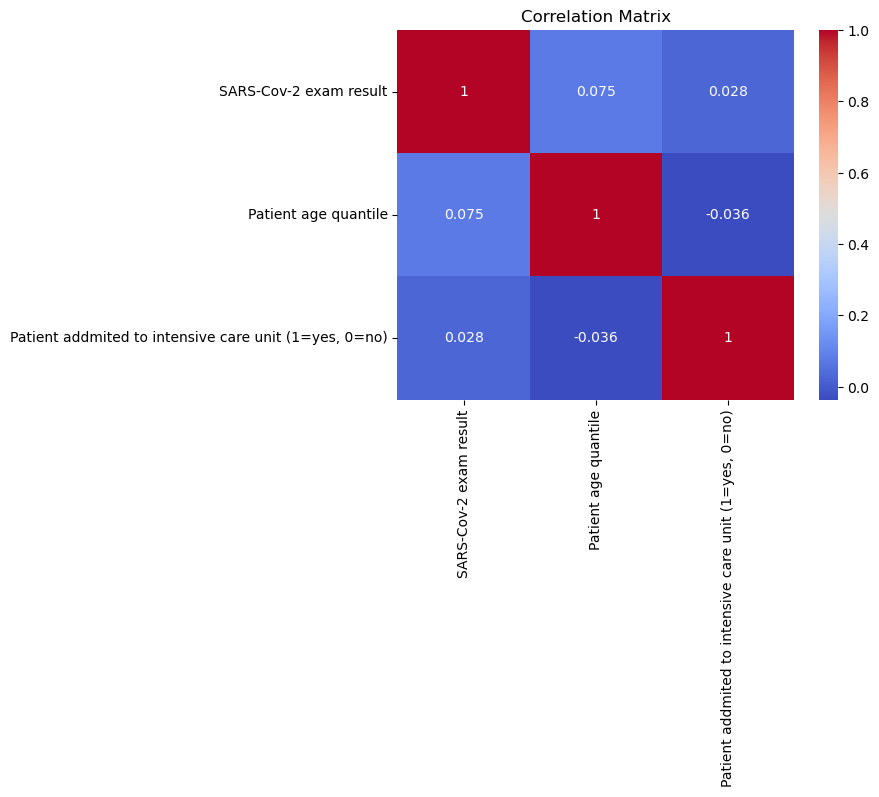

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2902/1008077940.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['SARS-Cov-2 exam result'] = encoder.inverse_transform(df_corr['SARS-Cov-2 exam result'])


In [90]:
df_work =df[col_keep]



df_corr = df[['SARS-Cov-2 exam result',
              'Patient age quantile',
              'Patient addmited to intensive care unit (1=yes, 0=no)']]

encoder = LabelEncoder()
df_corr['SARS-Cov-2 exam result'] = encoder.fit_transform(df_corr['SARS-Cov-2 exam result'])

correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

df_corr['SARS-Cov-2 exam result'] = encoder.inverse_transform(df_corr['SARS-Cov-2 exam result'])

## Pre-processing 

Transform the dataset to develop a ML model. <br>
- Create a train/test set <br>
- Eliminate NA <br>
- Encoding <br>
- Delete outliers <br>
- Features selection <br>
- Feature engineering <br>
- Feature Scaling <br>

## Modelling 

Transform, evaluate and improve the model. <br>
- Define evaluation function <br>
- Train different models <br>
- Optimization with GridSearchCV <br>
- Analyze errors <br>
- Learning curve an decisions <br>